# Image processing

In [56]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [29]:
axistitlesize = 25
axisticksize = 14
axislabelsize = 22
axislegendsize = 19

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Excercise 1: Image segmentation

Please choose either of these two excercises.

### Excercise 1.a

<img src="candy.jpg" width='100px'>

Load an RGB image from the file `candy.jpg`. Count the number of objects of different colors.

### Excercise 1.b

<img src="AirsoftBB.png" width='100px'>

There are several images of a mixture of Airsoft BBs in `/home/course/ImageExploration/SmallBalls/`. These images are from a granular segregation experiment, where the balls have different surface roughness according to their color and therefore the friction varies as well while the content of the bowl was stirred. 

Try to distinguish between the two kind of balls and find out their ratio in each image! 

In [78]:
img = plt.imread('candy.jpg')

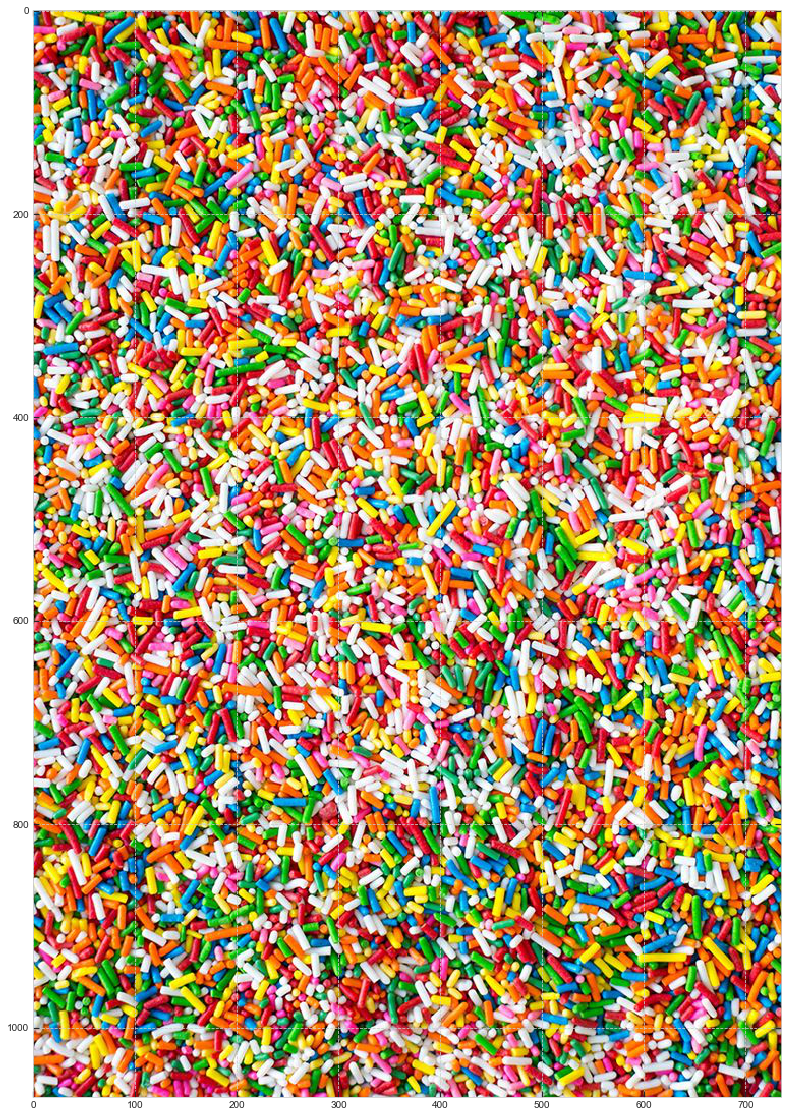

In [79]:
fig, axes = plt.subplots(figsize=(20,20))
axes.set_aspect('equal')

axes.imshow(img)

plt.show()

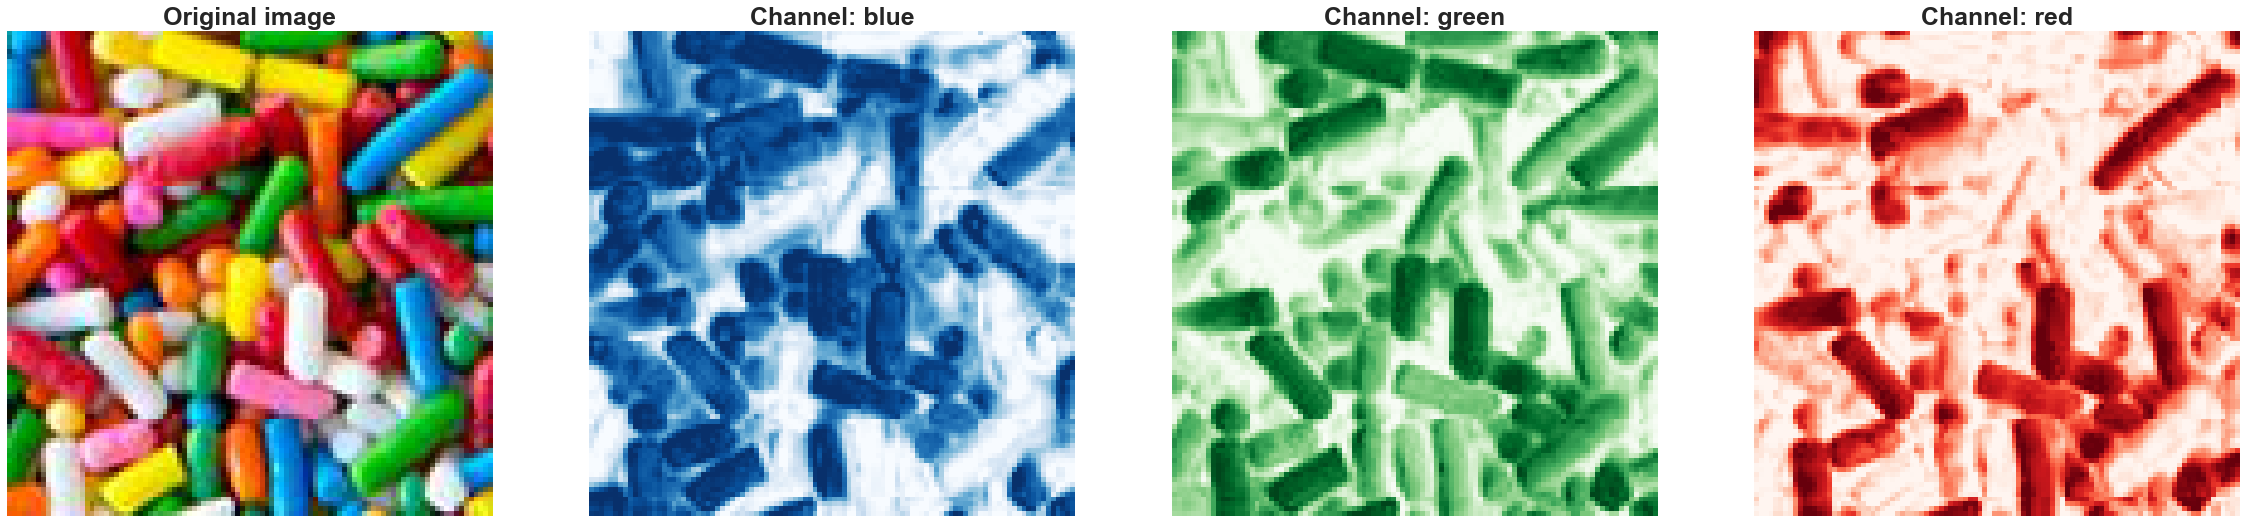

In [87]:
nrows = 1
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*10, nrows*10))

# Matplotlib imread stores values in BGR
colors = ['blue', 'green', 'red']
cms = ['Blues', 'Greens', 'Reds']

# Img slice to ne shown
img_slice = img[:100,:100,:]

for i in range(4):
    ax = axes[i]
    ax.axis('off')
    ax.set_aspect('equal')
    
    if i == 0:
        ax.imshow(img_slice)
        ax.set_title('Original image',
                     fontsize=axistitlesize, fontweight='bold')
    else:
        ax.imshow(img_slice[:,:,i-1], cmap=cms[i-1])
        ax.set_title('Channel: {0}'.format(colors[i-1]),
                     fontsize=axistitlesize, fontweight='bold')
    
plt.show()

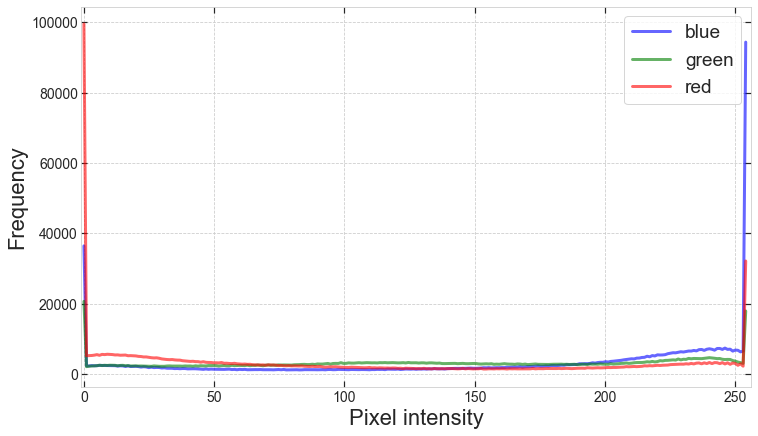

In [81]:
fig, axes = plt.subplots(figsize=(12,7))

# Matplotlib imread stores values in BGR
colors = ['blue', 'green', 'red']

for i in range(3):
    hist, bins = np.histogram(img[:,:,i], range=(0, 255), bins=256)    
    axes.plot(bins[:-1], hist, label=colors[i],
              color=colors[i], lw=3, alpha=0.6)

axes.set_xlabel('Pixel intensity', fontsize=axislabelsize)
axes.set_ylabel('Frequency', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.set_xlim(-1, 256)
    
axes.legend(fontsize=axislegendsize)
    
plt.show()

### Counting number of candies

In [82]:
from sklearn.cluster import KMeans
from skimage import morphology, measure

In [84]:
# Stackoverflow helped me very much:
# https://stackoverflow.com/questions/45043617/count-the-number-of-objects-of-different-colors-in-an-image-in-python/45080346
rows, cols, bands = img.shape
X = img.reshape(rows*cols, bands)

# Using KMeans clustering to segment image
# I set the number of clusters to 7, because approximately
# there are 7 differently colored candies in the image:
# Red, green, blue, yellow, orange, pink, white
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)
labels = kmeans.labels_.reshape(rows, cols)

for i in np.unique(labels):
    # Index each pixel in the image with its corresponding cluster label
    blobs = np.int_(morphology.binary_opening(labels == i))
    # Choose clusters to be colored as the mean of cluster centers
    color = np.around(kmeans.cluster_centers_[i])
    # Count number of different segments in clusters
    count = len(np.unique(measure.label(blobs))) - 1

    print('Color: {}  >>  Objects: {}'.format(color, count))

Color: [ 42. 156.  43.]  >>  Objects: 852
Color: [205. 145. 141.]  >>  Objects: 2056
Color: [231. 228. 227.]  >>  Objects: 1432
Color: [236. 176.  28.]  >>  Objects: 1319
Color: [196.  52.  38.]  >>  Objects: 1847
Color: [66. 41. 26.]  >>  Objects: 2901
Color: [ 23. 143. 193.]  >>  Objects: 601


### Visualizing segmented image

In [85]:
# Indian tech people helped me once again to visualize this:
# https://dzone.com/articles/cluster-image-with-k-means
kmeans_cluster = KMeans(n_clusters=7, random_state=0).fit(X)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

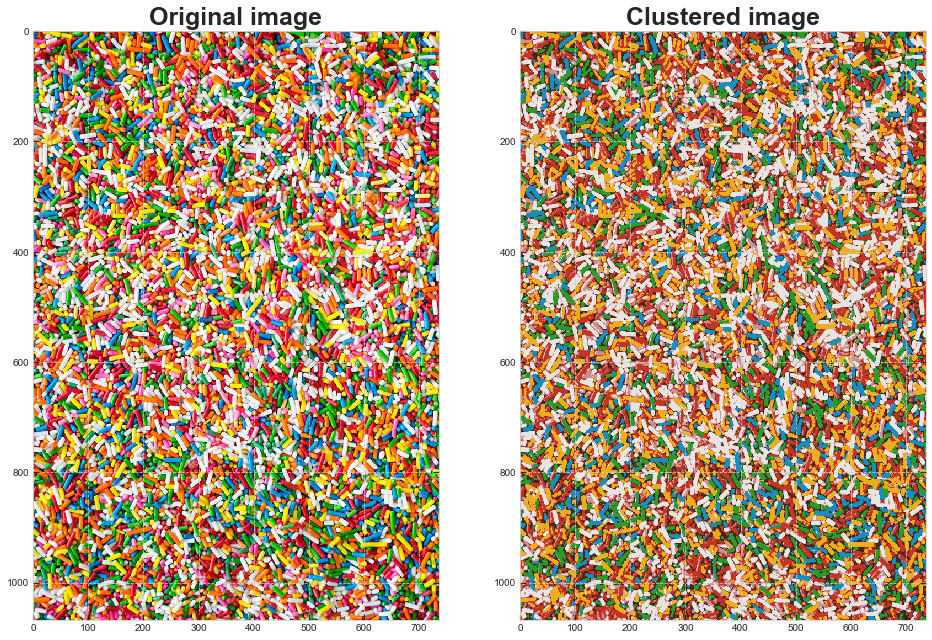

In [86]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
for i in range(ncols):
    axes[i].set_aspect('equal')

axes[0].imshow(img)
axes[1].imshow(cluster_centers[cluster_labels].reshape(rows, cols, bands)/255) # Should be normed to [0..1]

titles = ['Original', 'Clustered']

for i in range(ncols):
    axes[i].set_title('{0} image'.format(titles[i]),
                      fontsize=axistitlesize, fontweight='bold')

plt.show()

## Excercise 2: Sudoku

<img src="sudoku.jpg" width='200px'>

Load an RGB image from `sudoku.jpg` or an arbitrary file from `/home/course/ImageExploration/Sudoku/` folder. Convert it to grayscale. Try to find the border of the sudoku table and correct for the perspective until the table looks as rectangular as possible. Check if the image suffers from the camera lens distortion. Find the squares containing numbers and propose an algorythm to recognize the numbers?

In [88]:
img = plt.imread('sudoku.jpg')

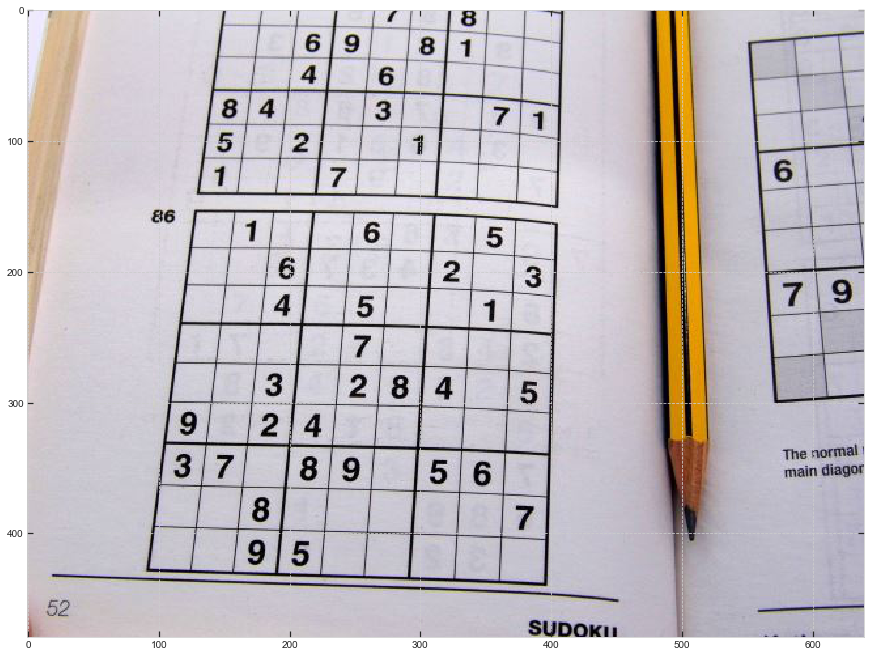

In [90]:
fig, axes = plt.subplots(figsize=(15,15))
axes.set_aspect('equal')

axes.imshow(img)

plt.show()

In [91]:
import scipy

In [96]:
# Convert RGB image to grayscale
# Using the ITU-R BT.601 luma transform for JPEG images
# Source 1: https://en.wikipedia.org/wiki/YCbCr
# Source 2: https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    return np.dot(rgb[:,:,:3], [0.2989, 0.5870, 0.1140])

In [97]:
img_gr = rgb2gray(img)

In [101]:
v = np.array([[-1, 1], [-1, 1], [-1, 1]], dtype = np.double)
h = np.array([[-1, -1, -1], [1, 1, 1]], dtype = np.double)

edge_v = scipy.signal.convolve2d(img_gr, v, mode='same')
edge_h = scipy.signal.convolve2d(img_gr, h, mode='same')

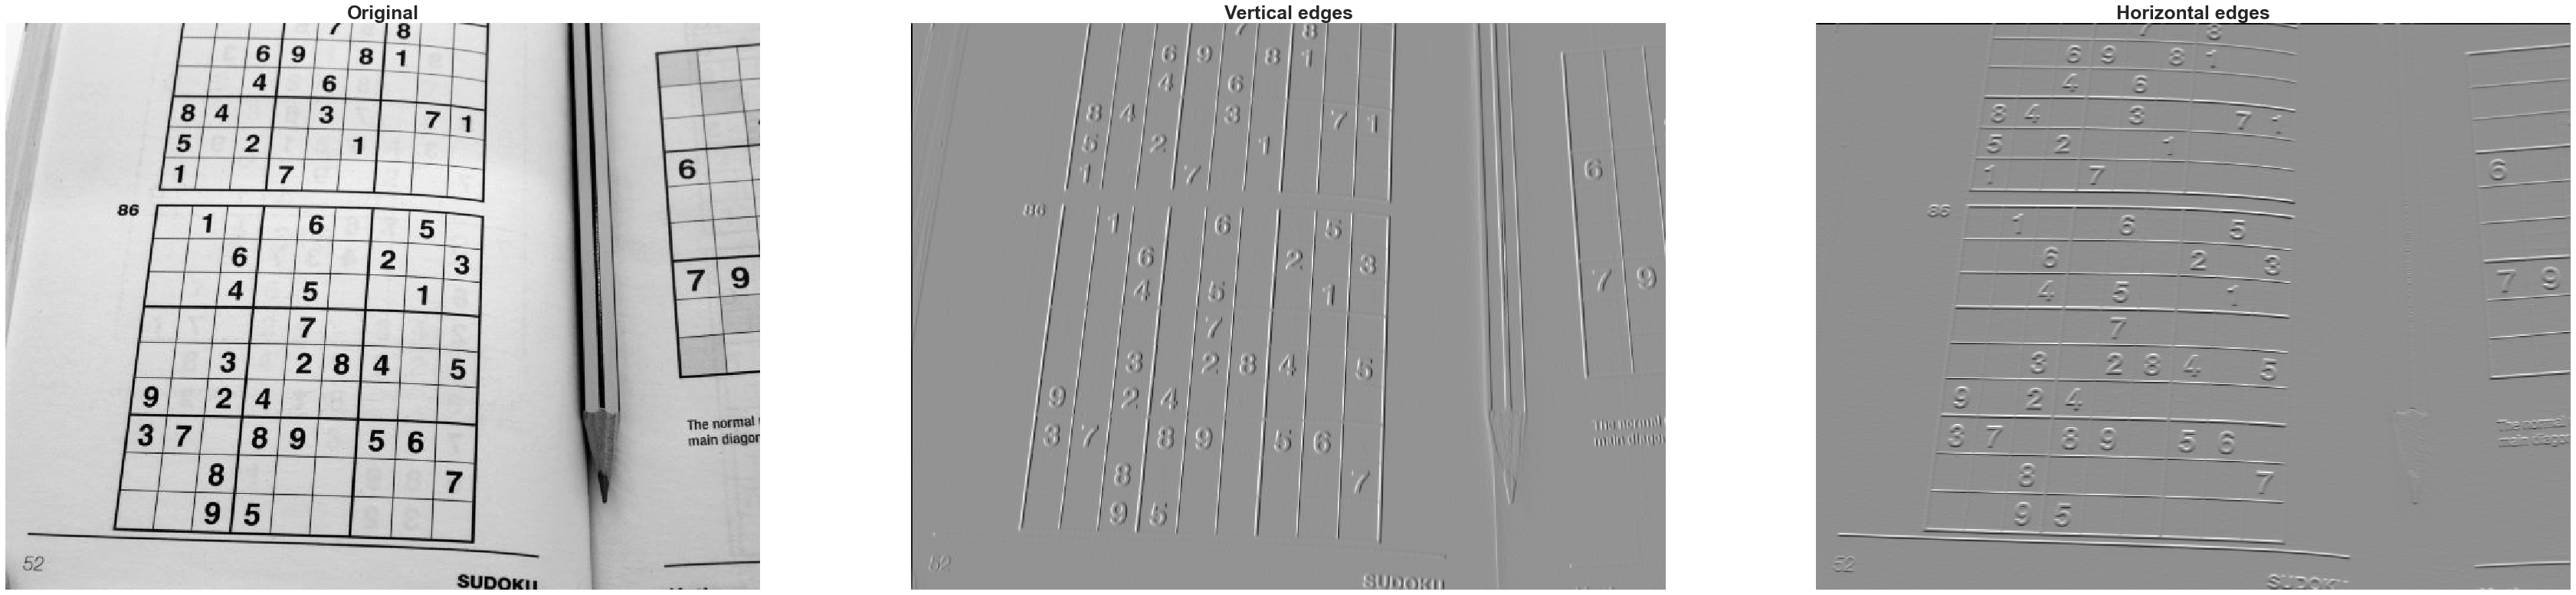

In [107]:
nrows = 1
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*20, nrows*20))

for i in range(ncols):
    axes[i].set_aspect('equal')
    axes[i].axis('off')

axes[0].imshow(img_gr, cmap='gray')
axes[0].set_title('Original',
                  fontsize=axistitlesize, fontweight='bold')

axes[1].imshow(edge_v, cmap='gray')
axes[1].set_title('Vertical edges',
                  fontsize=axistitlesize, fontweight='bold')

axes[2].imshow(edge_h, cmap='gray')
axes[2].set_title('Horizontal edges',
                  fontsize=axistitlesize, fontweight='bold')

plt.show()

### Corner Detection

In [109]:
v = np.array([[-1, 1], [-1, 1], [-1, 1]], dtype = np.double)
h = np.array([[-1, -1, -1], [1, 1, 1]], dtype = np.double)

edge = scipy.signal.convolve2d(img_gr, v, mode='same')
corner = scipy.signal.convolve2d(edge, h, mode='same')

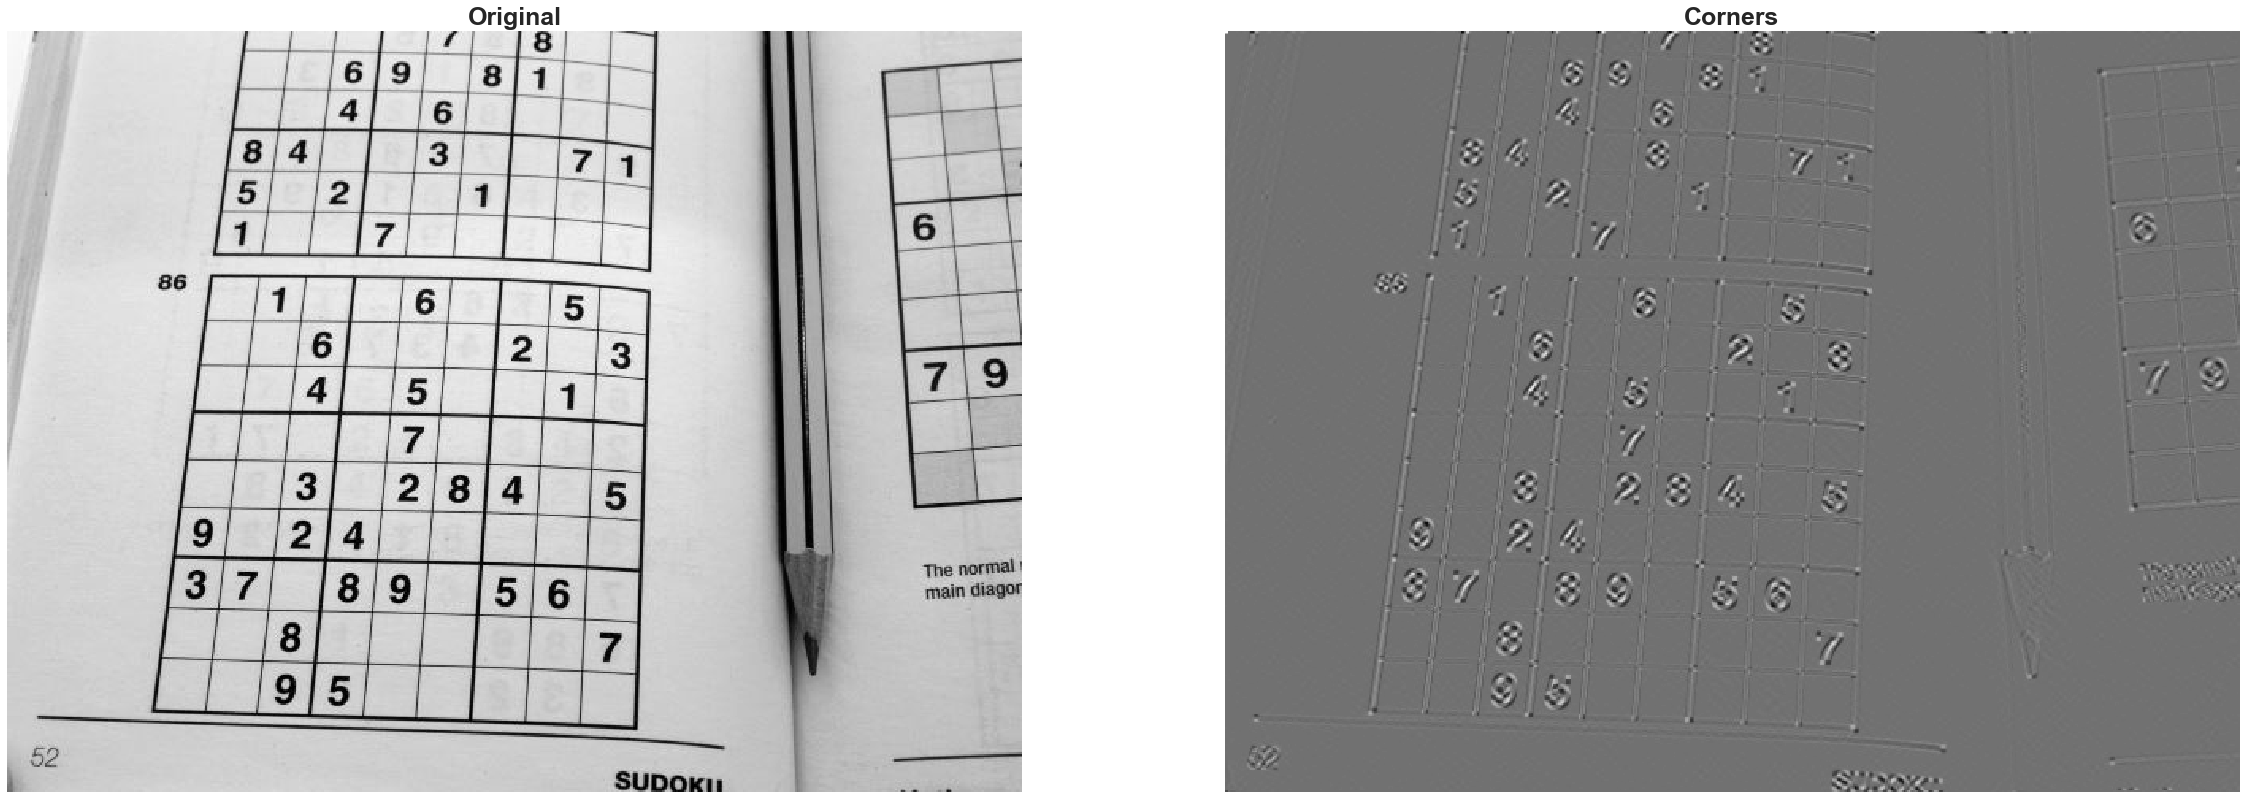

In [110]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*20, nrows*20))

for i in range(ncols):
    axes[i].set_aspect('equal')
    axes[i].axis('off')

axes[0].imshow(img_gr, cmap='gray')
axes[0].set_title('Original',
                  fontsize=axistitlesize, fontweight='bold')

axes[1].imshow(corner, cmap='gray')
axes[1].set_title('Corners',
                  fontsize=axistitlesize, fontweight='bold')


plt.show()

## Excercise 3: Count the cars in the street

There is a multitude of live camera streams to find and access on the Internet. In the [https://www.idokep.hu](https://www.idokep.hu) weather forecast site two of them have a good view of streets along the Danube:

* `https://stream.idokep.hu/live/hotelvictoria/s_orig.m3u8`
* `https://stream.idokep.hu/live/hotelvictoria2/s_orig.m3u8`

<img src="camera_stream.png" width='300px'>

Choose a stream you like and try to identify parts that are in motion in the video. Try track the movement of those parts like cars, bicycles or ships. Do some statistics like how long silent periods are, how many objects of interest are shown at once or how the speed of these objects is distributed. If you manage to carry out measurements in a longer period check if you can see patterns in the temporal evolutions, the source of which is the human factor.